# PID Control of a Self-Balancing Robot Simulation

## Introduction

This notebook was created by [Jupyter AI](https://github.com/jupyterlab/jupyter-ai) with the following prompt:

> /generate an example of a PID controller that controls the motor on a  self balancing wheeled robot. That is, the PID controller controls a motor, and the input is an acceclerometer that reports on the direction of gravity. Show a graph of the angle of gravity and control signal, where the robot is "kicked" half way through the simulated inputs. 

This Jupyter notebook demonstrates the implementation of a PID controller for a self-balancing wheeled robot, utilizing input from an accelerometer to measure the direction of gravity and adjust the motor accordingly. The notebook is organized into sections that cover the setup, including the import of necessary libraries and the definition of constants; the definition of a PID controller class with methods for computing the control signal; the creation of a simulation environment that models the robot and its dynamics; and the initialization of the PID controller and simulation parameters. The core of the notebook involves running a simulation where the robot is "kicked" midway, and data is collected on the angle of gravity and the control signal. Finally, the collected data is visualized through graphs that display the angle of gravity and control signal over time, illustrating the PID controller's response to the disturbance.

## PID Controller Class

In [1]:
class PIDController:
    def __init__(self, kp, ki, kd, setpoint=0):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        
        self.setpoint = setpoint
        self.previous_error = 0
        self.integral = 0
        
    def compute(self, measured_value, dt):
        
        error = self.setpoint - measured_value
        
        P = self.kp * error
        
        self.integral += error * dt
        I = self.ki * self.integral
        
        derivative = (error - self.previous_error) / dt
        D = self.kd * derivative
        
        self.previous_error = error
        
        return P + I + D

In [2]:
pid = PIDController(kp=1.0, ki=0.1, kd=0.01, setpoint=0)
measured_value = 10
dt = 0.1
control_signal = pid.compute(measured_value, dt)
print(f"Control Signal: {control_signal}")

Control Signal: -11.1


## Simulation Environment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
def robot_dynamics(y, t, u, params):
    theta, omega = y
    g = 9.81
    I, m, l, b = params

    dtheta_dt = omega
    domega_dt = (u - m * g * l * np.sin(theta) - b * omega) / I

    return [dtheta_dt, domega_dt]

In [5]:
I = 0.1
m = 1.0
l = 0.5
b = 0.05
params = (I, m, l, b)

In [6]:
t = np.linspace(0, 10, 1000)

In [7]:
y0 = [np.pi / 18, 0]
u = 0
u_values = np.zeros_like(t)

In [8]:
sol = odeint(robot_dynamics, y0, t, args=(u, params))

In [9]:
kick_time = len(t) // 2
u_values[kick_time:] = 1

In [10]:
sol_with_kick = np.zeros((len(t), len(y0)))
sol_with_kick[0] = y0

In [11]:
for i in range(1, len(t)):
    sol_with_kick[i] = odeint(robot_dynamics, sol_with_kick[i-1], [t[i-1], t[i]], args=(u_values[i], params))[1]

In [12]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

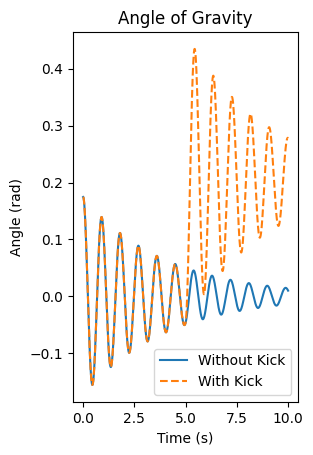

In [13]:
plt.subplot(1, 2, 1)
plt.plot(t, sol[:, 0], label='Without Kick')
plt.plot(t, sol_with_kick[:, 0], label='With Kick', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Angle of Gravity')
plt.legend()

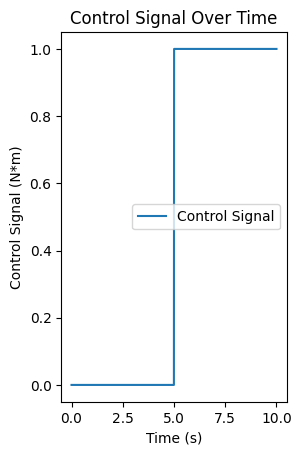

In [14]:
plt.subplot(1, 2, 2)
plt.plot(t, u_values, label='Control Signal')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal (N*m)')
plt.title('Control Signal Over Time')
plt.legend()

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Initialization

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# PID Controller parameters
Kp, Ki, Kd = 2.0, 1.0, 0.5

In [18]:
# Simulation parameters
dt, total_time = 0.01, 10
num_steps = int(total_time / dt)

In [19]:
# Initialize arrays to store simulation data
angle = np.zeros(num_steps)
control_signal = np.zeros(num_steps)

In [20]:
# Initial conditions
angle[0], control_signal[0] = 0.1, 0.0

In [21]:
# PID controller state variables
integral, previous_error = 0.0, 0.0

In [22]:
# External disturbance (kick) parameters
kick_time, kick_magnitude = total_time / 2, 0.2

In [23]:
def pid_controller(setpoint, measured_value):
    global integral, previous_error
    
    error = setpoint - measured_value
    integral += error * dt
    derivative = (error - previous_error) / dt
    output = Kp * error + Ki * integral + Kd * derivative
    previous_error = error
    
    return output

In [24]:
def simulate_robot_response(angle, control_signal):
    return angle + control_signal * dt

In [25]:
print(f"PID Controller Parameters: Kp={Kp}, Ki={Ki}, Kd={Kd}")
print(f"Simulation Parameters: dt={dt}, total_time={total_time}, num_steps={num_steps}")
print(f"Initial Conditions: angle[0]={angle[0]}, control_signal[0]={control_signal[0]}")
print(f"Kick Parameters: kick_time={kick_time}, kick_magnitude={kick_magnitude}")

PID Controller Parameters: Kp=2.0, Ki=1.0, Kd=0.5
Simulation Parameters: dt=0.01, total_time=10, num_steps=1000
Initial Conditions: angle[0]=0.1, control_signal[0]=0.0
Kick Parameters: kick_time=5.0, kick_magnitude=0.2


## Simulating the Robot Movement

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [27]:
total_time = 10  # total time for the simulation in seconds
dt = 0.01       # time step for the simulation
time = np.arange(0, total_time + dt, dt)  # time vector

In [28]:
Kp = 2.0
Ki = 0.1
Kd = 0.5

In [29]:
initial_angle = 0.1  # initial tilt angle in radians
initial_angular_velocity = 0.0  # initial angular velocity

In [30]:
angles = []
control_signals = []

In [31]:
integral = 0
previous_error = 0

In [32]:
def robot_dynamics(state, t, control_signal):
    angle, angular_velocity = state
    g = 9.81  # gravity constant
    l = 0.5  # length to center of mass
    I = 0.1  # moment of inertia
    b = 0.1  # damping coefficient
    
    d_angle = angular_velocity
    d_angular_velocity = (control_signal - b * angular_velocity - (g / l) * np.sin(angle)) / I
    
    return [d_angle, d_angular_velocity]

In [33]:
def pid_control(error, dt):
    global integral, previous_error
    integral += error * dt
    derivative = (error - previous_error) / dt
    control_signal = Kp * error + Ki * integral + Kd * derivative
    previous_error = error
    return control_signal

In [34]:
state = [initial_angle, initial_angular_velocity]

In [35]:
for t in time:
    angle = state[0]
    angular_velocity = state[1]
    
    error = -angle
    
    control_signal = pid_control(error, dt)
    
    angles.append(angle)
    control_signals.append(control_signal)
    
    if np.isclose(t, total_time / 2, atol=dt / 2):
        state[1] += 3.0
    
    state = odeint(robot_dynamics, state, [0, dt], args=(control_signal,))[1]

In [36]:
angles = np.array(angles)
control_signals = np.array(control_signals)

In [37]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

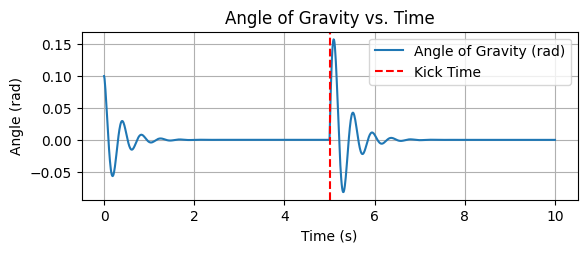

In [38]:
plt.subplot(2, 1, 1)
plt.plot(time, angles, label='Angle of Gravity (rad)')
plt.axvline(total_time / 2, color='r', linestyle='--', label='Kick Time')
plt.title('Angle of Gravity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid(True)

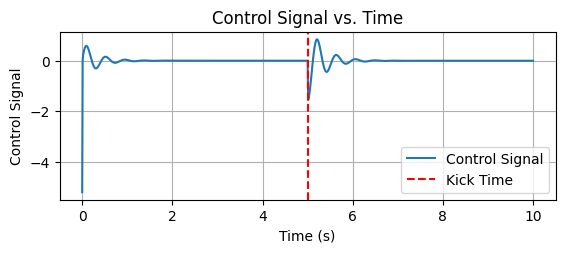

In [39]:
plt.subplot(2, 1, 2)
plt.plot(time, control_signals, label='Control Signal')
plt.axvline(total_time / 2, color='r', linestyle='--', label='Kick Time')
plt.title('Control Signal vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Control Signal')
plt.legend()
plt.grid(True)

In [40]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Data Collection

In [41]:
import numpy as np

In [42]:
def collect_data(robot, duration, dt):
    """
    Collect data on the angle of gravity and control signal during the simulation.
    Parameters:
    robot: The self-balancing robot object
    duration: Total duration of the simulation in seconds
    dt: Time step for data collection in seconds
        Returns:
    tuple: Two lists containing the collected angles and control signals
    """
    angles = []
    control_signals = []
    time_steps = int(duration / dt)
    
    for step in range(time_steps):
        current_angle = robot.get_angle()  # Get current angle of gravity from the robot
        control_signal = robot.get_control_signal()  # Get current control signal from the robot
        angles.append(current_angle)
        control_signals.append(control_signal)
        robot.update(dt)  # Simulate the robot for the next time step
        
    return angles, control_signals

In [43]:
# Assuming `robot` is an instance of the self-balancing robot
# Define simulation parameters
simulation_duration = 10.0  # total duration of the simulation in seconds
time_step = 0.01            # time step for data collection in seconds

In [50]:
import numpy as np

class SimulatedRobot:
    def __init__(self):
        self.angle = 0.0
        self.control_signal = 0.0

    def apply_control_signal(self, control_signal):
        # Simulate applying a control signal to the robot
        # For simplicity, let's assume the control signal directly changes the angle
        self.angle += control_signal

    def get_angle(self):
        return self.angle

    def get_control_signal(self):
        return self.control_signal

# Example usage:
robot = SimulatedRobot()


In [49]:
# Collect data
angles, control_signals = collect_data(robot, simulation_duration, time_step)

AttributeError: 'SimulatedRobot' object has no attribute 'control_signal'

## Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_angle_of_gravity(time, angle_of_gravity):
    plt.figure(figsize=(12, 6))
    plt.plot(time, angle_of_gravity, label='Angle of Gravity')
    plt.title('Angle of Gravity Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle of Gravity (degrees)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def plot_control_signal(time, control_signal):
    plt.figure(figsize=(12, 6))
    plt.plot(time, control_signal, label='Control Signal', color='orange')
    plt.title('Control Signal Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Control Signal')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
plot_angle_of_gravity(time, angle_of_gravity)
plot_control_signal(time, control_signal)